# LOGISTICS

## GDrive

In [0]:
# !google-drive-ocamlfuse -cc

In [56]:
from google.colab import drive
drive.mount('/content/drive')
%cd /gdrive

Mounted at /content/drive
/gdrive


## Imports

In [0]:
import pandas as pd 
import os
import numpy as np
import string
import matplotlib.pyplot as plt
import datetime
import matplotlib.style as style
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
from sklearn import tree
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.tree.export import export_text
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
!pip install -q pydot
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz 

## Data Loading

In [61]:
cd /content/drive/My Drive/EUNSUK

/content/drive/My Drive/EUNSUK


In [0]:
data=pd.read_csv('train_modified.csv',delimiter=',')

In [63]:
# split dataframe between analog and digital
valves=[]
pumps=[]
analog=[]
for cols in data.columns[1:-1]:
#   print(cols)
  if cols.startswith('MV'):
    valves.append(cols)
#     print("found a VALVE","-"*10)
  elif cols.startswith('P'):
    if not cols.startswith('PIT'):
      pumps.append(cols)
  else:
    analog.append(cols)
np.transpose(pumps)

array(['P101', 'P102', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206',
       'P301', 'P302', 'P401', 'P402', 'P403', 'P404', 'P501', 'P502',
       'P601', 'P602', 'P603'], dtype='<U4')

In [64]:
(data.columns)

Index([' Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201',
       'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204',
       'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302',
       'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401',
       'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502',
       'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501',
       'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603',
       'Normal/Attack'],
      dtype='object')

In [65]:
print(len(valves))
print(len(pumps))
print(len(analog))

6
19
23


Count of states

In [0]:
pdata=data[['P101', 'P102', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206',
       'P301', 'P302', 'P401', 'P402', 'P403', 'P404', 'P501', 'P502',
       'P601', 'P602', 'P603']]

In [0]:
len(pdata.columns)

19

In [0]:
outarray=[]
namearr=[]
for value in pdata:
  # print(data[value].value_counts())
  if data[value].value_counts().count()>1:
    x,y=data[value].value_counts()
    outarray.append([value,x,y])
  else:
    namearr.append(value)
    outarray.append([value,496800,0])

print(namearr)

['P102', 'P201', 'P202', 'P204', 'P206', 'P401', 'P403', 'P404', 'P502', 'P601', 'P603']


In [0]:
outarray

[['P101', 371040, 125760],
 ['P102', 496800, 0],
 ['P201', 496800, 0],
 ['P202', 496800, 0],
 ['P203', 370097, 126703],
 ['P204', 496800, 0],
 ['P205', 327682, 169118],
 ['P206', 496800, 0],
 ['P301', 494829, 1971],
 ['P302', 407510, 89290],
 ['P401', 496800, 0],
 ['P402', 493614, 3186],
 ['P403', 496800, 0],
 ['P404', 496800, 0],
 ['P501', 493462, 3338],
 ['P502', 496800, 0],
 ['P601', 496800, 0],
 ['P602', 492868, 3932],
 ['P603', 496800, 0]]

In [0]:
vdata=data[['MV101', 'MV201', 'MV301', 'MV302', 'MV303', 'MV304']]

In [0]:
len(vdata.columns)

6

In [0]:
outarray=[]
for value in vdata:
  print(vdata[value].value_counts())
  if vdata[value].value_counts().count()>1:
    x,y=vdata[value].value_counts()
    outarray.append([value,x,y])
  else:
    # x=data[value].value_counts()
    outarray.append([value,496800,0])

2    358885
1    137915
Name: MV101, dtype: int64
2    371524
1    125276
Name: MV201, dtype: int64
1    492391
2      4409
Name: MV301, dtype: int64
2    400441
1     96359
Name: MV302, dtype: int64
1    484578
2     12222
Name: MV303, dtype: int64
1    481019
2     15781
Name: MV304, dtype: int64


In [0]:
outarray

[['MV101', 358885, 137915],
 ['MV201', 371524, 125276],
 ['MV301', 492391, 4409],
 ['MV302', 400441, 96359],
 ['MV303', 484578, 12222],
 ['MV304', 481019, 15781]]

In [0]:
import numpy
numpy.savetxt("voutarray.csv", outarray, delimiter=",",fmt='%s')


Plots of Digital and Analog Signals
---



---



In [0]:
for cols in valves:
  print(data[cols].value_counts())

NameError: ignored

<Figure size 432x288 with 0 Axes>

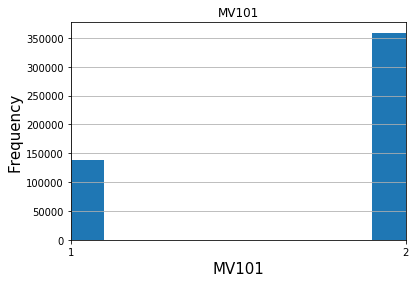

<Figure size 432x288 with 0 Axes>

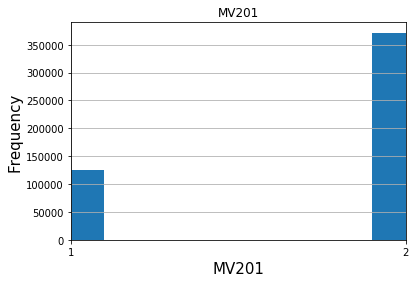

<Figure size 432x288 with 0 Axes>

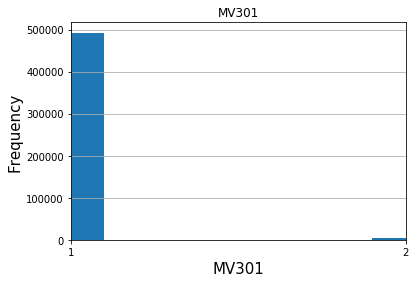

<Figure size 432x288 with 0 Axes>

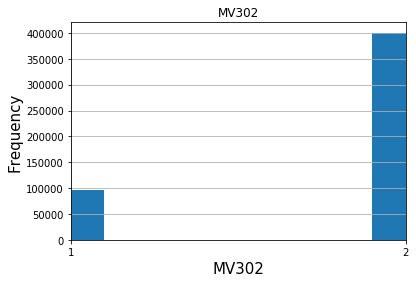

<Figure size 432x288 with 0 Axes>

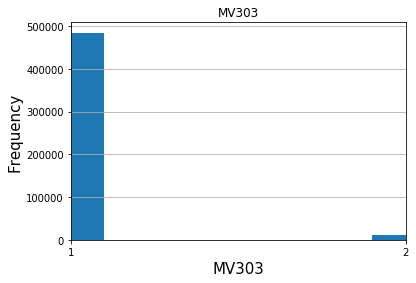

<Figure size 432x288 with 0 Axes>

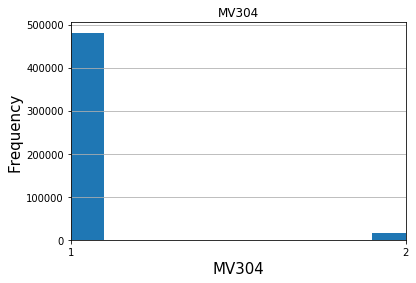

In [0]:
for cols in valves:
 
  fig=plt.figure()
  data.hist(column=cols)
  plt.xlabel(cols,fontsize=15)
  plt.ylabel("Frequency",fontsize=15)
  plt.xlim([1,2])
  plt.xticks([1,2])
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<Figure size 432x288 with 0 Axes>

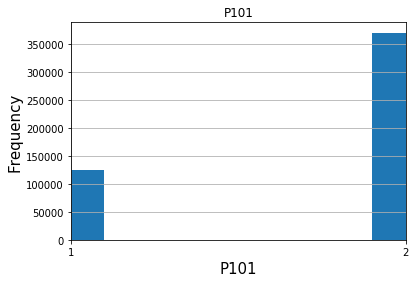

<Figure size 432x288 with 0 Axes>

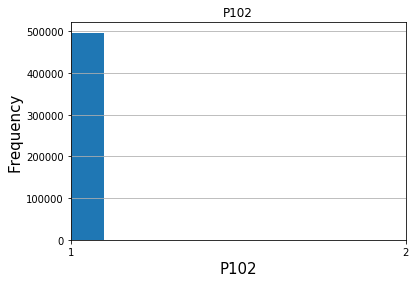

<Figure size 432x288 with 0 Axes>

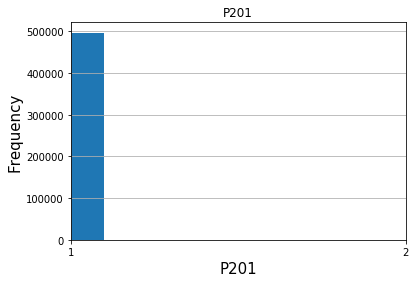

<Figure size 432x288 with 0 Axes>

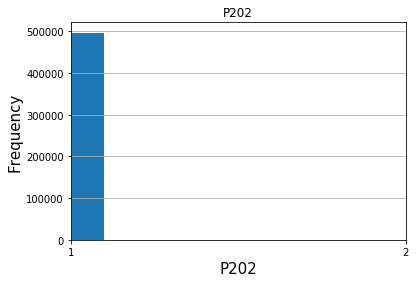

<Figure size 432x288 with 0 Axes>

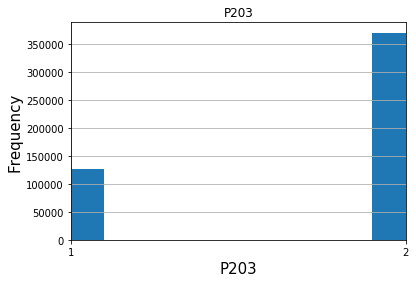

<Figure size 432x288 with 0 Axes>

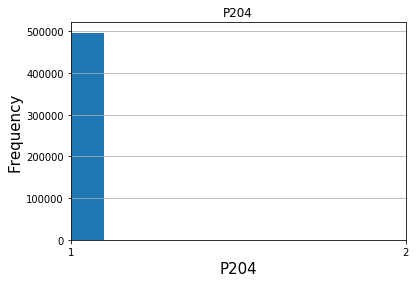

<Figure size 432x288 with 0 Axes>

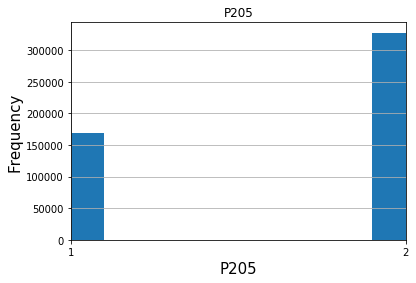

<Figure size 432x288 with 0 Axes>

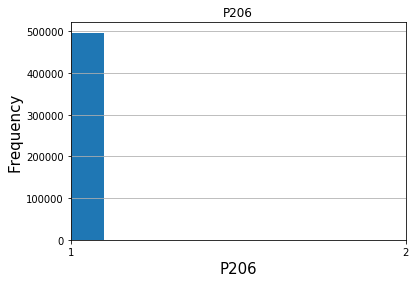

<Figure size 432x288 with 0 Axes>

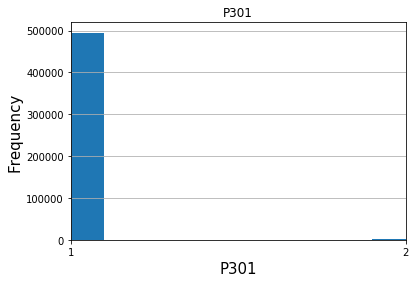

<Figure size 432x288 with 0 Axes>

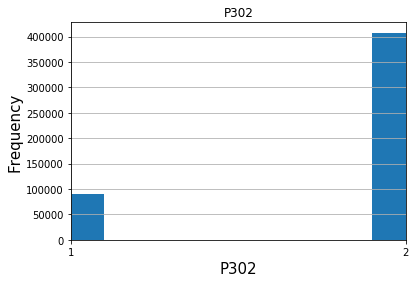

<Figure size 432x288 with 0 Axes>

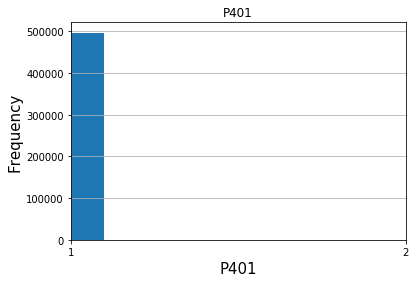

<Figure size 432x288 with 0 Axes>

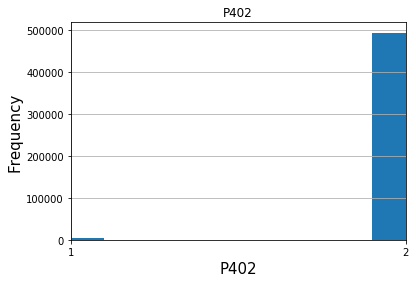

<Figure size 432x288 with 0 Axes>

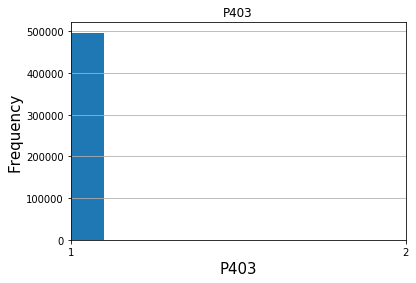

<Figure size 432x288 with 0 Axes>

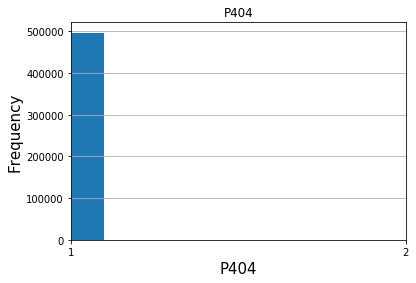

<Figure size 432x288 with 0 Axes>

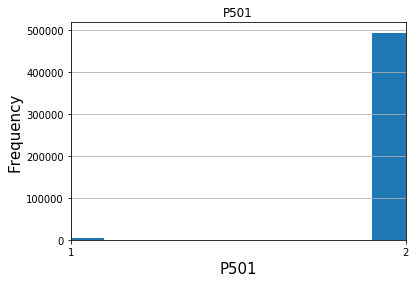

<Figure size 432x288 with 0 Axes>

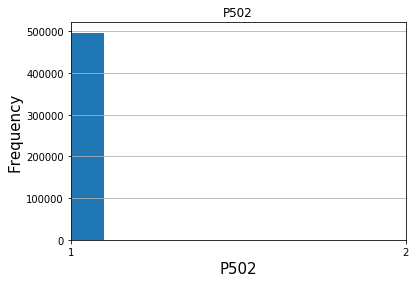

<Figure size 432x288 with 0 Axes>

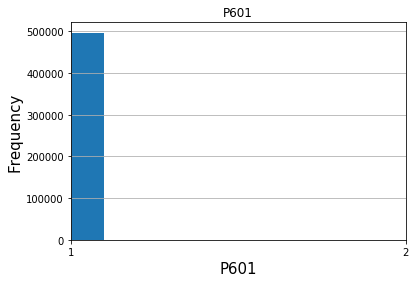

<Figure size 432x288 with 0 Axes>

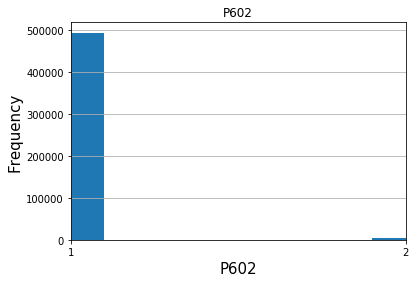

<Figure size 432x288 with 0 Axes>

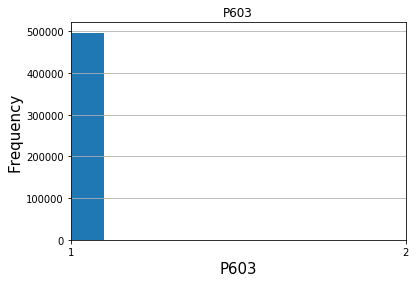

In [0]:
for cols in pumps:
 
  fig=plt.figure()
  data.hist(column=cols)
  plt.xlabel(cols,fontsize=15)
  plt.ylabel("Frequency",fontsize=15)
  plt.xlim([1,2])
  plt.xticks([1,2])
  
  

In [0]:
x=data['MV101']

(0.0, 3.0)

<Figure size 432x288 with 0 Axes>

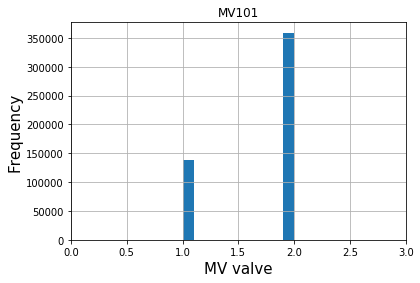

In [0]:
fig=plt.figure()
data.hist(column="MV101")
plt.xlabel("MV valve",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xlim([0.0,3.0])


Data Types
---



['MV101', 'MV201', 'MV301', 'MV302', 'MV303', 'MV304']


['P101', 'P102', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'P301', 'P302', 'P401', 'P402', 'P403', 'P404', 'P501', 'P502', 'P601', 'P602', 'P603']


['FIT101', 'LIT101', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'DPIT301', 'FIT301', 'LIT301', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'FIT601']

## SAMPLING DATA

In [0]:
#DATA POINTS
data_points_1=10000
data_points_2=496800
data_range=data_points_2-data_points_1
xpoints = [i for i in range(data_range)]
#_____________SAMPLE_____________________#
sample_data=data[data_points_1:data_points_2]

In [67]:
feature_cols_comp = ['MV101', 'MV201', 'MV301', 'MV302', 'MV303', 'MV304',
                'P101', 'P102', 'P201', 'P202', 'P203', 'P204', 'P205', 
                'P206', 'P301', 'P302', 'P401', 'P402', 'P403', 'P404', 
                'P501', 'P502', 'P601', 'P602', 'P603',
                'FIT101', 'LIT101', 'AIT201', 'AIT202', 'AIT203', 'FIT201',
                'DPIT301', 'FIT301', 'LIT301', 'AIT401', 'AIT402', 'FIT401',
                'LIT401', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 
                'FIT501', 'FIT502', 'FIT503', 'FIT504', 'FIT601']

len(feature_cols_comp)

48

# Phi Coeficicient

In [0]:
from sklearn.metrics import matthews_corrcoef
binary_signals=['MV101', 'MV201', 'MV301', 'MV302', 'MV303', 'MV304',
 'P101', 'P102', 'P201', 'P202', 'P203', 'P204',
 'P205', 'P206', 'P301', 'P302', 'P401', 'P402', 
 'P403', 'P404', 'P501', 'P502', 'P601', 'P602',
 'P603','UV401'] 
total_binary=len(binary_signals)
matthews_matrix=[]
matthews_matrix.append(binary_signals)
for i in range(total_binary):
  x_pred=data[binary_signals[i]]
  new_arr=[]
  for j in range(total_binary):
    y_pred=data[binary_signals[j]]
    new_arr.append(matthews_corrcoef(x_pred, y_pred)) 
  matthews_matrix.append(new_arr)

In [0]:
mat_matrix=np.array(matthews_matrix)


In [0]:
print(mat_matrix[0])

['MV101' 'MV201' 'MV301' 'MV302' 'MV303' 'MV304' 'P101' 'P102' 'P201'
 'P202' 'P203' 'P204' 'P205' 'P206' 'P301' 'P302' 'P401' 'P402' 'P403'
 'P404' 'P501' 'P502' 'P601' 'P602' 'P603' 'UV401']


In [0]:
print(mat_matrix.shape)

(27, 26)


In [0]:
pwd

'/gdrive/My Drive/EUNSUK'

In [0]:
import numpy
numpy.savetxt("mat_matrix", mat_matrix, delimiter=",",fmt='%s')


# TREES
---



---



In [0]:
#FUNCTION: DECISION TREE 
def generate_rtree(feature, output, depth,feature_cols):
      # Split data 70% training and 30% test
      X_train, X_test, y_train, y_test = train_test_split(feature,output, test_size=0.3, random_state=1) 

      target_value=(str(output.columns.values[0]))
      decision_tree = DecisionTreeClassifier(random_state=0, max_depth=depth)
      clf = decision_tree.fit(X_train,y_train)
      #tree.plot_tree(clf)
      
      d_tr = export_text(clf, feature_names=feature_cols)
      
      print(target_value)
      print(d_tr)
      return clf

In [0]:
def generate_vtree(X_feature,y_out,depth,classes,feature_cols):
      from sklearn.datasets import load_iris
      from sklearn import tree
      #iris = load_iris()
      clf = tree.DecisionTreeClassifier(random_state=0, max_depth=depth)
      clf = clf.fit(X_feature,y_out)
      import graphviz 
      dot_data = tree.export_graphviz(clf, out_file=None) 
      graph = graphviz.Source(dot_data) 
      graph.render("iris") 
      dot_data = tree.export_graphviz(clf, out_file=None, 
                           feature_names=feature_cols,  
                           class_names=classes,  
                           filled=True, rounded=True,  
                           special_characters=True)  
      graph = graphviz.Source(dot_data)  
      graph 
      

## Decision Tree P101 

In [0]:
feature_cols_p101 = ['MV101', 'MV201', 
                 'FIT101', 'LIT101', 'LIT301', 'AIT202', 'AIT203']

X_data = sample_data[feature_cols_p101] # Features
target=['P101']
y_data = sample_data[target] # Target variable
classes=["on","off"]


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.15,shuffle=False, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(413780, 7) (73020, 7) (413780, 1) (73020, 1)


In [0]:
#DATA POINTS
data_points_1=10000
data_points_2=49600
data_range=data_points_2-data_points_1
xpoints = [i for i in range(data_range)]
#_____________SAMPLE_____________________#
sample_plot=data[data_points_1:data_points_2]

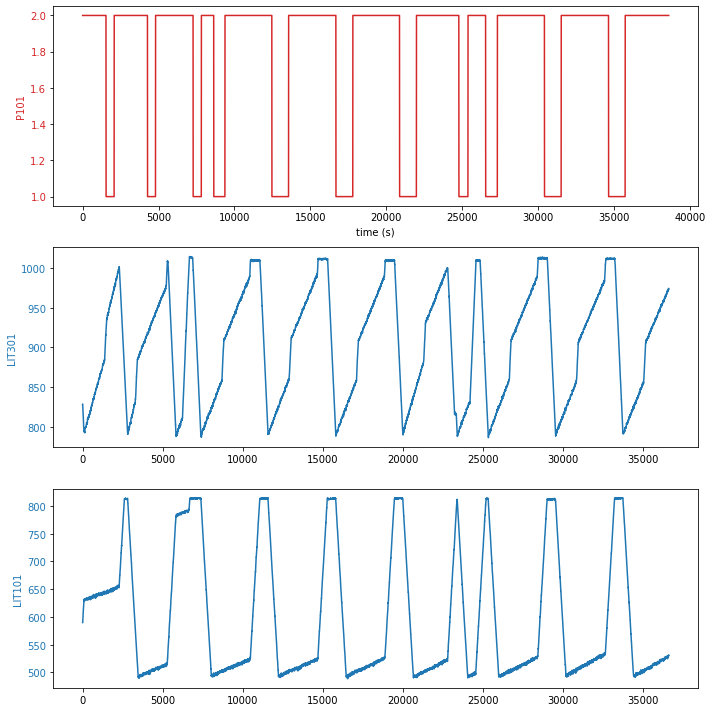

In [41]:
fig, ax = plt.subplots(3,figsize=(10,10))
color = 'tab:red'
ax[0].set_xlabel('time (s)')
ax[0].set_ylabel('P101', color=color)
ax[0].plot(list(range(len(sample_plot['P101'][1000:110000]))),sample_plot['P101'][1000:110000], color=color)
ax[0].tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax[1].set_ylabel('LIT301', color=color)  # we already handled the x-label with ax1
ax[1].plot(list(range(len(sample_plot['LIT101'][3000:110000]))),sample_plot['LIT301'][3000:110000], color=color)
ax[1].tick_params(axis='y', labelcolor=color)
fig.tight_layout()

color = 'tab:blue'
ax[2].set_ylabel('LIT101', color=color)  # we already handled the x-label with ax1
ax[2].plot(list(range(len(sample_plot['LIT101'][3000:110000]))),sample_plot['LIT101'][3000:110000], color=color)
ax[2].tick_params(axis='y', labelcolor=color)
fig.tight_layout()

plt.show()

In [52]:
clf=generate_rtree(X_train,y_train,3,feature_cols_p101)
print("\n","FEATURE IMPORTANCE","\n")
print(clf.feature_importances_)

P101
|--- MV201 <= 1.50
|   |--- class: 1
|--- MV201 >  1.50
|   |--- LIT301 <= 999.92
|   |   |--- LIT301 <= 999.84
|   |   |   |--- class: 2
|   |   |--- LIT301 >  999.84
|   |   |   |--- class: 2
|   |--- LIT301 >  999.92
|   |   |--- LIT301 <= 1000.04
|   |   |   |--- class: 1
|   |   |--- LIT301 >  1000.04
|   |   |   |--- class: 1


 FEATURE IMPORTANCE 

[0.         0.99782758 0.         0.         0.00217242 0.
 0.        ]


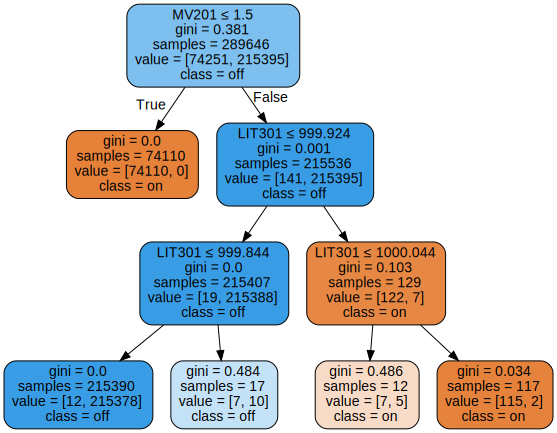

In [53]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_cols_p101,  
                     class_names=classes,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [0]:
from sklearn.metrics import accuracy_score
y_pred=clf.predict(X_test)

#ACCURACY of Decision Tree (P101)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.9964170692431562


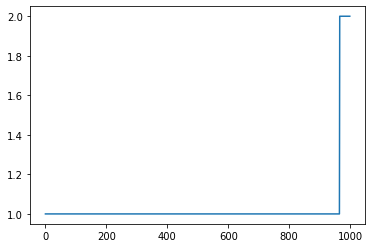

In [0]:
#PLOT Predicted P101
plt.plot(list(range(len(y_pred[:1000]))),y_pred[:1000])

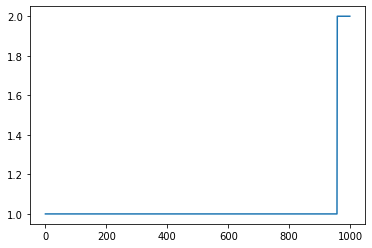

In [0]:
#PLOT Test Set 
plt.plot(list(range(len(y_test[:1000]))),y_test[:1000])

## Decision Tree MV101 

In [0]:
feature_cols = ['FIT101','LIT101','LIT301', 'P302', 'P401', 'P402', 'P403', 'P404', 'P501', 'P502',
       'P601', 'P602', 'P603']
X_data = sample_data[feature_cols] # Features
target=['MV101']
y_data = sample_data[target] # Target variable
classes=["on","off"]


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.25, random_state = 0)


In [0]:
clf=generate_rtree(X_train,y_train,2,feature_cols)
print("\n","FEATURE IMPORTANCE","\n")
print(clf.feature_importances_)

P201
|--- class: 0


 FEATURE IMPORTANCE 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


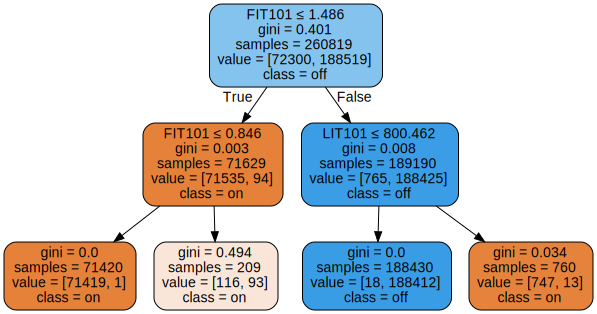

In [0]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_cols,  
                     class_names=classes,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [0]:
from sklearn.metrics import accuracy_score
y_pred=clf.predict(X_test)

#ACCURACY of Decision Tree (P101)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.9993719806763285


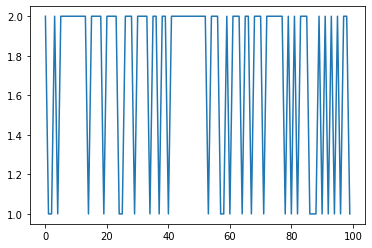

In [0]:
#PLOT Predicted P101
plt.plot(list(range(len(y_pred[:100]))),y_pred[:100])

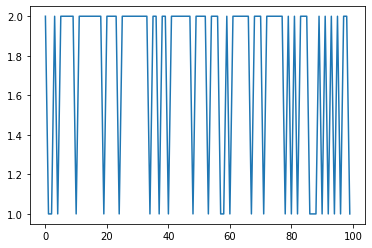

In [0]:
#PLOT Test Set 
plt.plot(list(range(len(y_test[:100]))),y_test[:100])

## Decision Tree P203 

In [0]:
feature_cols = ['MV201','AIT201', 'AIT202', 'AIT203', 'FIT201', 'DPIT301', 'FIT301', 'P603']
X_data = sample_data[feature_cols] # Features
target=['P203']
y_data = sample_data[target] # Target variable
classes=["on","off"]


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.25, random_state = 0)


In [0]:
clf=generate_rtree(X_train,y_train,2,feature_cols)
print("\n","FEATURE IMPORTANCE","\n")
print(clf.feature_importances_)

P203
|--- FIT201 <= 2.02
|   |--- FIT201 <= 2.00
|   |   |--- class: 1
|   |--- FIT201 >  2.00
|   |   |--- class: 1
|--- FIT201 >  2.02
|   |--- MV201 <= 1.50
|   |   |--- class: 1
|   |--- MV201 >  1.50
|   |   |--- class: 2


 FEATURE IMPORTANCE 

[0.00436972 0.         0.         0.         0.99563028 0.
 0.         0.        ]


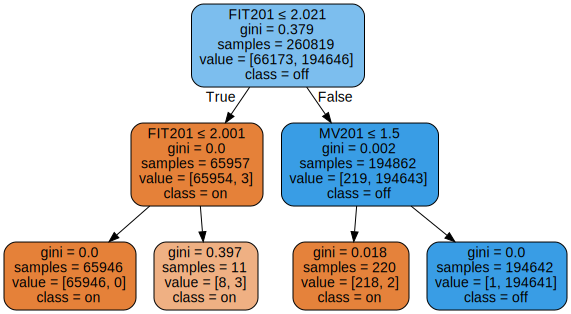

In [0]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_cols,  
                     class_names=classes,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [0]:
from sklearn.metrics import accuracy_score
y_pred=clf.predict(X_test)

#ACCURACY of Decision Tree (P101)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 1.0


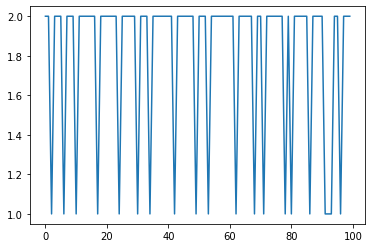

In [0]:
#PLOT Predicted P101
plt.plot(list(range(len(y_pred[:100]))),y_pred[:100])

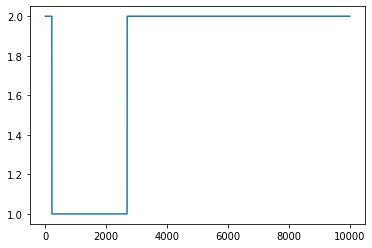

In [0]:
#PLOT Test Set 
plt.plot(list(range(len(data['P203'][:10000]))),data['P203'][:10000])

In [0]:
feature_cols = ['MV201','AIT201', 'AIT202', 'AIT203', 'FIT201', 'DPIT301', 'FIT301']
X_feature = sample_data[feature_cols] # Features
target=['P203']
y_out = sample_data[target] # Target variable

generate_rtree(X_feature,y_out,2)

TypeError: ignored

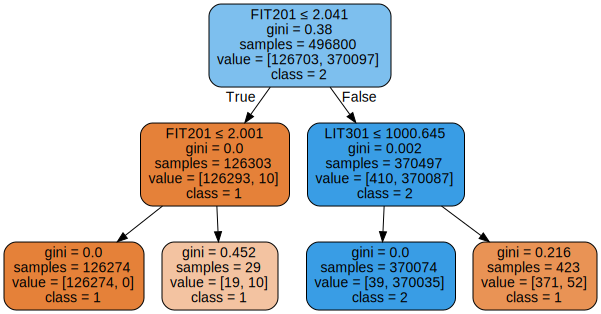

In [0]:
feature_cols = ['FIT101','LIT101', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'DPIT301', 'FIT301', 'LIT301']
X_feature = sample_data[feature_cols] # Features
target=['P203']
y_out = sample_data[target] # Target variable
classes=["1","2"]
from sklearn.datasets import load_iris
from sklearn import tree
#iris = load_iris()
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf = clf.fit(X_feature,y_out)
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_cols,  
                     class_names=classes,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Decision Tree P205 

**P205**

In [0]:
feature_cols = ['MV201','AIT201', 'AIT202', 'AIT203', 'FIT201', 'DPIT301', 'FIT301']
X_feature = sample_data[feature_cols] # Features
target=['P205']
y_out = sample_data[target] # Target variable

generate_rtree(X_feature,y_out,2,feature_cols)

P205
|--- FIT201 <= 2.06
|   |--- FIT201 <= 2.00
|   |   |--- class: 1
|   |--- FIT201 >  2.00
|   |   |--- class: 1
|--- FIT201 >  2.06
|   |--- AIT203 <= 436.00
|   |   |--- class: 2
|   |--- AIT203 >  436.00
|   |   |--- class: 1



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

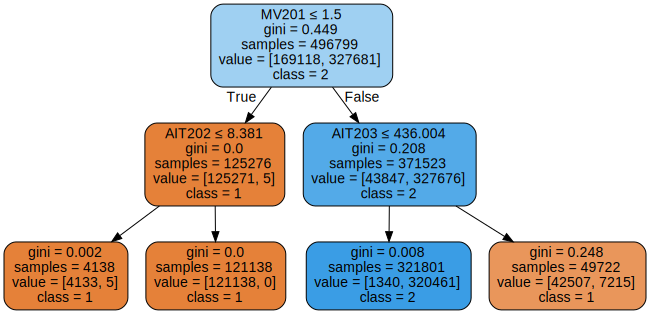

In [0]:
feature_cols = ['MV201','FIT101','LIT101', 'AIT201', 'AIT202', 'AIT203',  'DPIT301', 'FIT301', 'LIT301']
X_feature = sample_data[feature_cols] # Features
target=['P205']
y_out = sample_data[target] # Target variable
classes=["1","2"]
from sklearn.datasets import load_iris
from sklearn import tree
#iris = load_iris()
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf = clf.fit(X_feature,y_out)
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_cols,  
                     class_names=classes,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Decision Tree P302

**P301**

In [0]:
feature_cols = ['DPIT301', 'FIT301', 'LIT301',  'FIT401', 'LIT401']
X_feature = sample_data[feature_cols] # Features
target=['P302']
y_out = sample_data[target] # Target variable

generate_rtree(X_feature,y_out,4)

TypeError: ignored

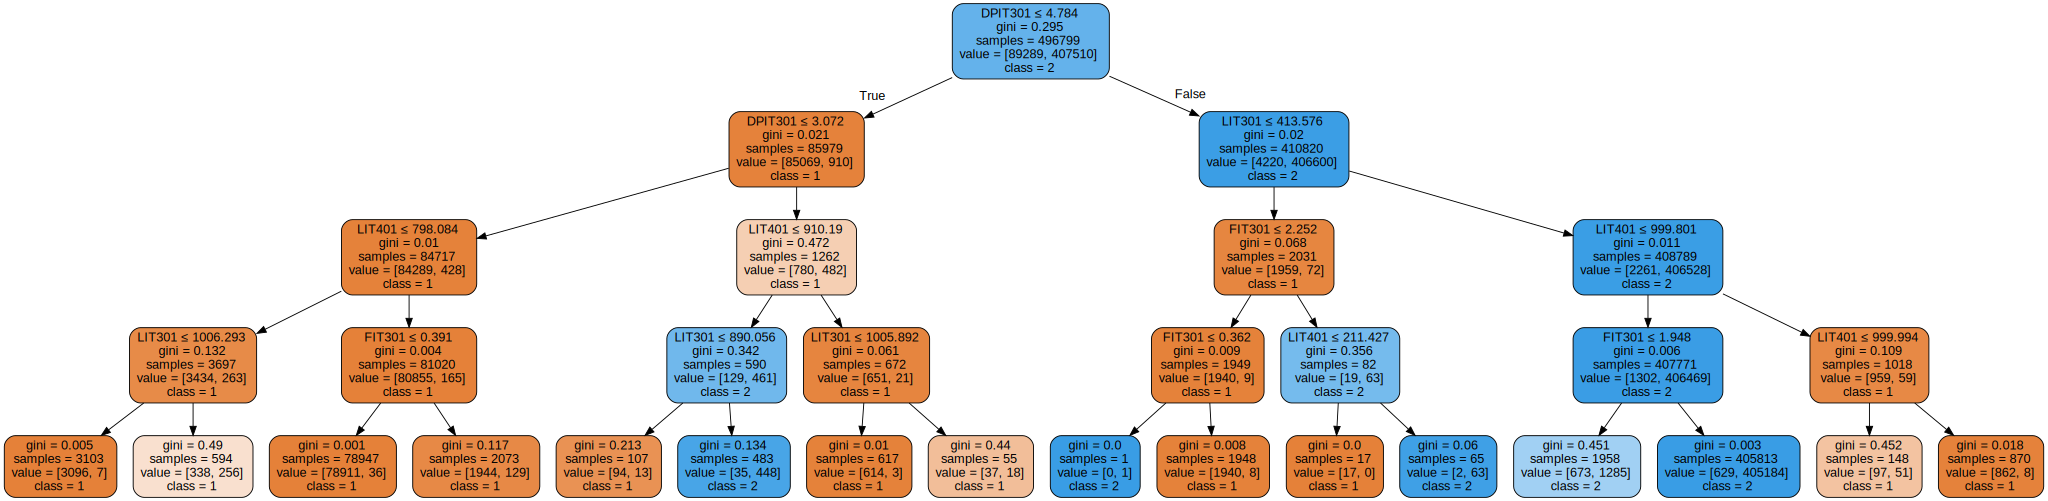

In [0]:
from IPython.display import Image 
feature_cols = ['DPIT301', 'FIT301', 'LIT301',  'FIT401', 'LIT401']
X_feature = sample_data[feature_cols] # Features
target=['P302']
y_out = sample_data[target] # Target variable
classes=["1","2"]
from sklearn.datasets import load_iris
from sklearn import tree
#iris = load_iris()
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=4)
clf = clf.fit(X_feature,y_out)
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_cols,  
                     class_names=classes,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
# graph.write_png('/content/MV101_112.png')
# Image(graph.create_png())

# PLOTS


## Transition Counts
---



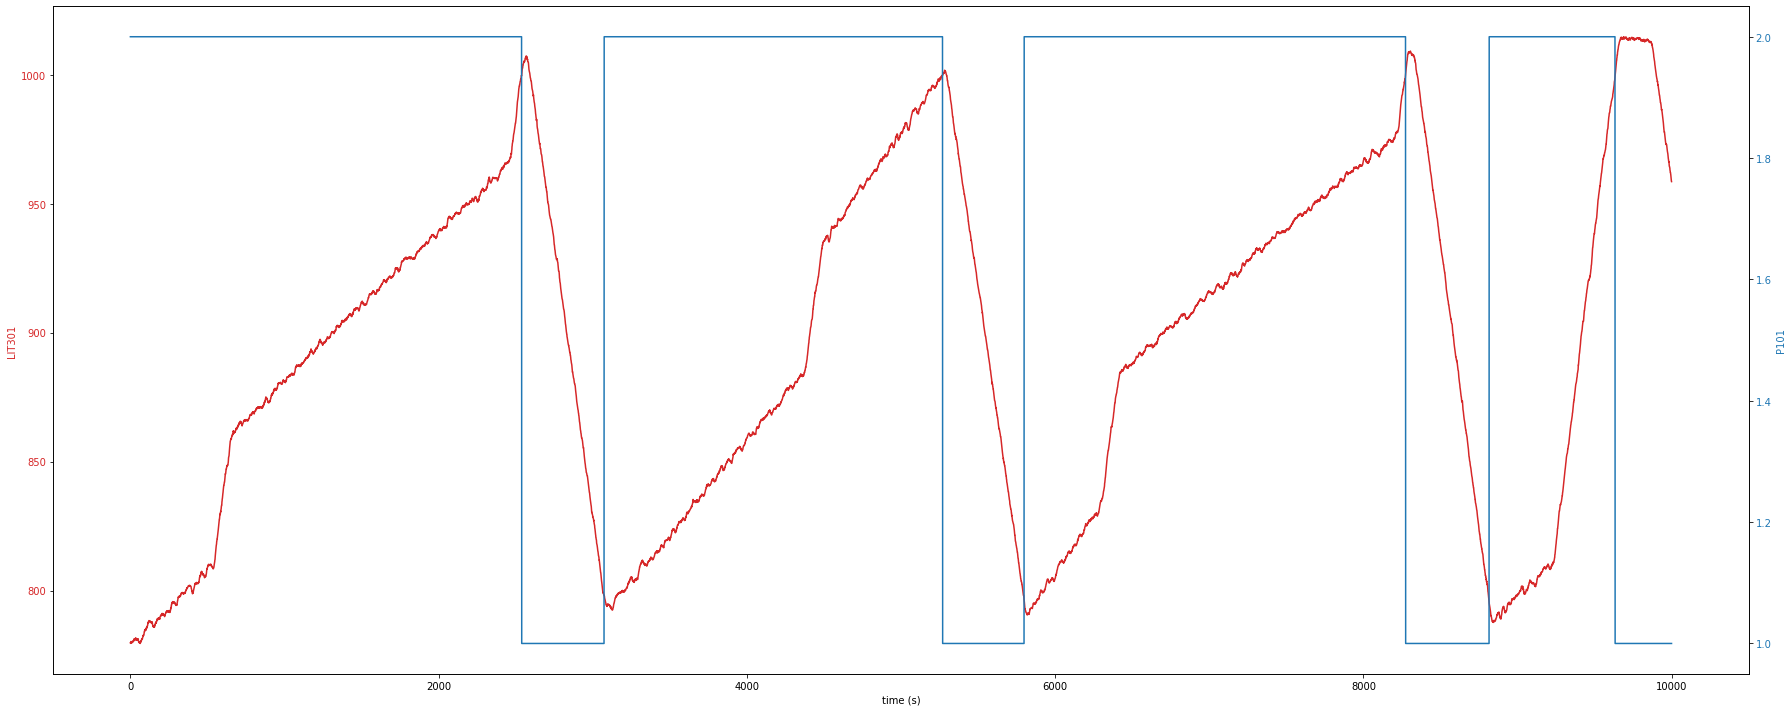

In [78]:
plot_analog_bool(['LIT301','P101'],data[10000:20000], (25,10))
# on,off=num_transitions(data['FIT01'])
# print(on,off)

##  Analog vs Boolean


In [0]:
# data=data[10000:30000]

In [0]:
#Global_Parameters
h_tolerance=0.04   # 0.5% tolerance
h_min_range=2
h_hard_tolerance=10
h_window=10

In [0]:
def num_transitions(bool_feature):
  cur_state=0
  
  # unique_items=bool_feature.unique()
  # uilist=unique_items.tolist()

  # unique_Off_tran=[]
  # unique_On_tran=[]
  num_off_transition=0
  num_on_transition=0
  for i in range(len(bool_feature)):
    cur_state=bool_feature[i]
    if i>1:
      prev_state=bool_feature[i-1]
      if prev_state==2 and cur_state ==1 :
        # OFF Transition from 2 -> 1
        num_off_transition+=1
      if prev_state==1 and cur_state ==2 :
        # ON Transition from 1 -> 2
        num_on_transition+=1 
  return num_on_transition,num_off_transition

In [0]:
def transition(bool_data,analog_datum):
  cur_state=0
  
  unique_items=bool_data.unique()
  uilist=unique_items.tolist()

  unique_Off_tran=[]
  unique_On_tran=[]

  for i in range(len(bool_data)):
    cur_state=bool_data[i]
    if i>1:
      prev_state=bool_data[i-1]
      if prev_state==2 and cur_state ==1 :
        # OFF Transition from 2 -> 1
        unique_Off_tran.append(analog_datum[i])
      
      if prev_state==1 and cur_state ==2 :
        # ON Transition from 1 -> 2
        unique_On_tran.append(analog_datum[i])

  return unique_Off_tran  , unique_On_tran

In [135]:
unique_Off_tran  , unique_On_tran=transition(data['P101'],data['LIT101'])


KeyError: ignored

In [0]:
print(unique_On_tran)

In [113]:
print(unique_Off_tran)

[264.5243, 366.7778, 652.9696, 516.6055, 793.1412, 524.8486, 524.8879, 525.8692, 522.2579, 496.2334, 529.5197, 534.8188, 534.4656, 531.9534, 529.9515, 530.344, 534.7403, 516.998, 790.6289999999999, 536.3104, 532.6599, 533.9553, 533.3272, 534.073, 537.0169999999999, 536.0356, 533.3272, 542.1591, 534.8581, 540.589, 538.2338, 537.6843, 532.6992, 527.0861, 528.2636, 530.3047, 529.2057, 532.9739, 529.9907, 526.6935, 529.1664, 524.4169, 528.3421, 528.7739, 527.7926, 531.3253, 528.4207, 525.6337, 525.2019, 522.8467, 527.2823, 527.7534, 530.9328, 536.0356, 525.0449, 524.3383, 527.5571, 523.6709999999999, 529.7945, 531.7178, 526.4973, 527.3608, 532.3459, 536.1142, 532.3066, 531.7571, 536.4282, 530.3047, 532.7384, 531.0898, 528.4207, 530.8151, 527.6748, 532.1497, 530.1085, 531.7964, 534.1123, 534.3085, 532.1497, 530.3832, 532.9347, 540.589, 531.7964, 495.4091, 533.5627, 545.4171, 493.7212, 535.4076, 492.1118, 536.6637, 493.1717, 533.445, 498.9026, 534.6618, 529.559, 532.5422, 533.1702, 536.3889,

In [0]:
def check_on_off_dis_similarity(on_data_points,off_data_points):
  
  count=0
  h_hard_tolerance=(np.mean(on_data_points)+np.mean(off_data_points))/2
  for on_datum,off_datum in zip(on_data_points,off_data_points):
    if abs(off_datum - on_datum) < h_hard_tolerance:
      count+=1
  per_count=(count/len(on_data_points))*100

  if per_count>90:
    return False
  else:
    return True

In [115]:
check_on_off_dis_similarity(unique_Off_tran  , unique_On_tran)

False

In [0]:
def percent_inrange(data_points,tolerance):
  max_data=max(data_points)
  # print(max_data)
  
  min_data=min(data_points)
  # print(min_data)
  total_data_points=len(data_points)
  count=0
  for i in range(len(data_points)): 
    datum_c=data_points[i]
    if i >1:
      datum_p=data_points[i-1]
      if abs(datum_p-datum_c) <= tolerance:
        
        count+=1
  return (count/total_data_points)*100

In [0]:
def acceptable_range(data_points,tolerance):
  max_data=max(data_points)
  min_data=min(data_points)
  if max_data -min_data > tolerance:
    return False
  else:
    return True

In [118]:
print(percent_inrange(on_range[1:],8))

98.33333333333333


In [119]:
off_range,on_range=transition(data['MV101'],data['LIT101'])

KeyError: ignored

In [120]:
off_range[1:10],on_range[1:100]

([800.9918,
  801.2665,
  800.717,
  800.6777,
  800.4815,
  800.5992,
  801.2665,
  800.9133,
  800.7955],
 [493.3287,
  494.5847,
  495.2128,
  494.4277,
  493.4857,
  493.1324,
  493.5642,
  494.31,
  495.3698,
  495.25199999999995,
  495.6838,
  496.0764,
  494.467,
  493.1324,
  495.6838,
  496.1548,
  495.6053,
  494.153,
  497.8427,
  496.2334,
  495.8801,
  495.4483,
  497.9998,
  495.9586,
  495.8016,
  494.5847,
  495.8801,
  494.2707,
  494.467,
  494.9773,
  495.095,
  492.1511,
  493.7212,
  494.153,
  496.8614,
  495.4876,
  492.5044,
  496.1941,
  493.0539,
  494.8595,
  493.8782,
  496.0764,
  494.0745,
  493.839,
  496.3511,
  490.895,
  497.5287,
  497.1754,
  496.8614,
  496.6259,
  492.8576,
  496.4689,
  493.7604,
  493.6427,
  497.5287,
  493.6427,
  495.6446,
  493.8782,
  495.9586,
  495.5661,
  494.1137,
  497.725,
  495.095,
  495.8409,
  494.153,
  494.8595,
  494.3885,
  494.8595,
  494.1137,
  494.153,
  493.5642,
  498.51,
  492.5829,
  494.2315,
  494.270

In [0]:
def cal_tolerance(analog_datum):
  rng= analog_datum.max() - analog_datum.min()
  tolerance=rng*h_tolerance  
  return tolerance

In [0]:
def cal_range(analog_datum):
  return analog_datum.max() - analog_datum.min()

In [123]:
cal_range(data['FIT601'])

1.741326

In [124]:
cal_tolerance(data['LIT101'])

19.208728

In [0]:
def compare_transition_values(bool_data,analog_data):

  for analog_datum in analog_data:
    # print(data[analog_datum][:2])
    # print(data[bool_data].values)

    # if cal_range(data[analog_datum])>h_min_range:
    tolerance=cal_tolerance(data[analog_datum])
    Off_Crossover,On_Crossover=transition( data[bool_data], data[analog_datum])
    plt.figure()
    plt.plot([alph for alph in range(len(Off_Crossover[1:]))],Off_Crossover[1:])
    str_label='Off_Crossover'+str(analog_datum)
    plt.ylabel(str_label)
    plt.plot([alph for alph in range(len(On_Crossover[1:]))],On_Crossover[1:])
    str_label_o='ON_Crossover'+str(analog_datum)
    plt.ylabel(str_label_o)
    plt.show
    
          
    print( analog_datum," On CrossOver: ",np.mean(On_Crossover)," Percent_Similar_Crossover: ", percent_inrange(On_Crossover[1:],tolerance),"%")
    print( analog_datum," Off CrossOver: ",np.mean(Off_Crossover)," Percent_Similar_Crossover: ", percent_inrange(Off_Crossover[1:],tolerance),"%")

      # else:
      #   print(analog_datum, "Similar ON OFF Values")
    # else:
    #   print(analog_datum, "Range of value is Less than Tolerance")
    




In [126]:
bool_data='P101'
analog_data=['LIT301','LIT101','FIT201']
compare_transition_values(bool_data,analog_data)

KeyError: ignored

In [127]:
#IMPACT OF NOISE in finding the correct cross_over
bool_data='P302'
analog_data=['LIT401']
compare_transition_values(bool_data,analog_data)

KeyError: ignored

In [128]:
bool_data='P203'
analog_data=['AIT202']
compare_transition_values(bool_data,analog_data)

KeyError: ignored

In [129]:
bool_data='P205'
analog_data=['AIT203']
compare_transition_values(bool_data,analog_data)

KeyError: ignored

In [130]:
bool_data='MV101'
analog_data=['FIT101', 'LIT101', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'DPIT301', 'FIT301', 'LIT301', 
             'AIT401', 'AIT402', 'FIT401', 'LIT401', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 
             'FIT501', 'FIT502', 'FIT503', 'FIT504', 'FIT601']


compare_transition_values(bool_data,analog_data)

KeyError: ignored

##  Boolean vs Boolean 

In [0]:
def bool_transition(bool_data):
  cur_state=0
  unique_items=bool_data.unique()
  uilist=unique_items.tolist()

  on_transition_array=[0]*len(bool_data)
  off_transition_array=[0]*len(bool_data)
  for i in range(len(bool_data)):
    cur_state=bool_data[i]
    if i>1:
      prev_state=bool_data[i-1]
      if prev_state==2 and cur_state ==1 :
        # OFF Transition from 2 -> 1
        off_transition_array[i]=1
        
      
      if prev_state==1 and cur_state ==2 :
        # ON Transition from 1 -> 2
        on_transition_array[i]=1
        

  return off_transition_array  , on_transition_array
  



In [0]:
off_transition_array  , on_transition_array=bool_transition(data['MV101'])

NameError: ignored

In [0]:
off_transition_array.count(1)  

NameError: ignored

In [0]:
def co_transition(bool_data_1,bool_data_2):

  off_transition_array_1  , on_transition_array_1 =bool_transition(data[bool_data_1])
  off_transition_array_2  , on_transition_array_2 =bool_transition(data[bool_data_2])
  
  count_off_array_1=off_transition_array_1.count(1)
  count_on_array_1 =on_transition_array_1.count(1)


  count_off_array_2 =off_transition_array_2.count(1)
  count_on_array_2 =on_transition_array_2.count(1)


  count_cotransition_on=0
  count_cotransition_off=0
  window=200
  for i in range(len(off_transition_array_1)):
    if off_transition_array_1[i] ==1:
      if i >window:
        for j in range(i-window, i+window):
          if off_transition_array_2[j] ==1:
            count_cotransition_off+=1
    
    elif on_transition_array_1[i] ==1:
      if i >window:
        for j in range(i-window, i+window):
          if on_transition_array_2[j] ==1:
            count_cotransition_on+=1


  return (count_cotransition_on/count_on_array_1)*100  , (count_cotransition_off/count_off_array_1)*100

In [0]:
per_on, per_off=co_transition('MV101','MV101')

NameError: ignored

In [0]:
print(per_on, per_off)

NameError: ignored

In [0]:
def co_transition_data(bool_data_1, data):
  for datum in data:
    per_on, per_off=co_transition(bool_data_1,datum)
    print(per_on, per_off)
    

      # print(datum, "high Co_transition")


In [0]:
bool_data='MV101'
bool_to_compare= ['MV201', 'MV301', 'MV302', 'MV303', 'MV304',
         'P101', 'P102', 'P201', 'P202', 'P203', 'P204', 'P205',
         'P206', 'P301', 'P302', 'P401', 'P402', 'P403', 'P404',
         'P501', 'P502', 'P601', 'P602', 'P603'] 

co_transition_data(bool_data,bool_to_compare)

0.8264462809917356 2.479338842975207
0.8264462809917356 0.8264462809917356
0.8264462809917356 2.479338842975207
0.8264462809917356 0.8264462809917356
1.6528925619834711 84.29752066115702
0.0 2.479338842975207
0.0 0.0
0.0 0.0
0.0 0.0
0.0 2.479338842975207


KeyboardInterrupt: ignored

In [0]:
bool_data='P101'
bool_to_compare= ['MV101','MV201', 'MV301', 'MV302', 'MV303', 'MV304',
         'P101', 'P102', 'P201', 'P202', 'P203', 'P204', 'P205',
         'P206', 'P301', 'P302', 'P401', 'P402', 'P403', 'P404',
         'P501', 'P502', 'P601', 'P602', 'P603'] 

co_transition_data(bool_data,bool_to_compare)

NameError: ignored

UF Transfer Pump (P-301/ P-302) Operation

a. Oneduty,onestandby
b. To interlock with RO Feed Tank level (LIT-401)

i. Low Setpoint: 800mm 􏰀 UF Pump (P-301/ P-302) ON

ii. High Setpoint: 1000mm 􏰀 UF Pump (P-301/ P-302) OFF

c. To interlock with UF Feed Tank Level (LIT-301)

i. Low Low Setpoint: 250mm 􏰀 Alarm & UF Pump (P-301/ P-302) OFF

d. TointerlockwithUFFeedFlowmeter(FIT-301)

i. Low Setpoint: 0.5m3/h 􏰀 Pump P-301/ P-302 STOP

In [0]:
bool_data='P101'
analog_data=[ 'LIT101', 'FIT301', 'LIT301']

#'FIT101', 'LIT101', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'DPIT301', 'FIT301', 'LIT301', 'AIT401', 'AIT402', 'FIT401',
compare_transition_values(bool_data,analog_data)

LIT101 93.4959349593496
LIT101 1.6260162601626018
FIT301 Similar ON OFF Values
LIT301 100.0
LIT301 100.0


In [0]:
def print_crossover_point(signals,data):
  bool_signal, analog_signal =data[signals]
  # 
  bool_signal=data[bool_signal].values
  analog_signal=data[analog_signal].values
  # print(bool_signal[:10],analog_signal[:10])
  cur_state=0
  # unique_items=bool_signal.unique()
  # uilist=unique_items.tolist()

  for i in range(len(bool_signal)):
    # print(bool_signal[i])
    cur_state=bool_signal[i]
    if i > 1:
      prev_state=bool_signal[i-1]
      if cur_state == 1 and prev_state==2: # Switch OFF_state
        print("OFF", analog_signal[i]  )

      if cur_state == 2 and prev_state==1: # Switch ON_state
        print("ON", analog_signal[i]  )




In [0]:
print_crossover_point(['P101','LIT301'], sample_data)

OFF 999.8638
ON 798.1527
OFF 1000.1039999999999
ON 796.15
OFF 1000.425
ON 795.0686
OFF 1000.064
ON 794.9484
OFF 1000.625
ON 795.8697
OFF 999.9039
ON 795.5092
OFF 1000.425
ON 796.11
OFF 999.9039
ON 795.3889999999999
OFF 1000.865
ON 795.1888
OFF 1000.3439999999999
ON 795.5893
OFF 1000.2239999999999
ON 795.7495


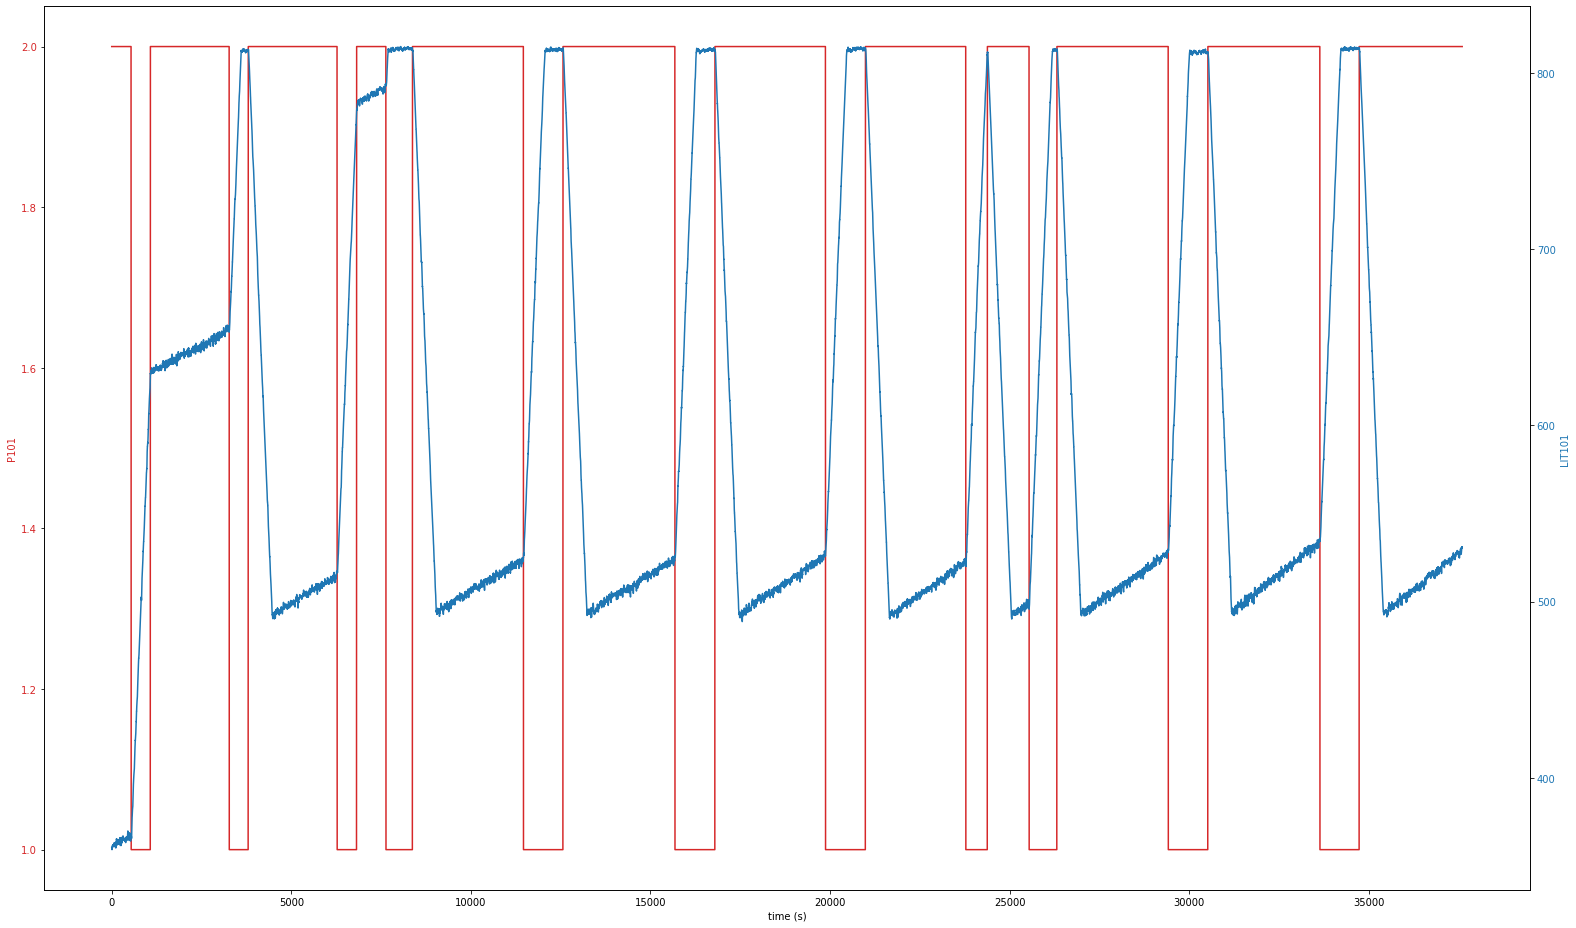

In [0]:
plot_analog_bool(['P101','LIT101'], sample_data, (22,13))


## PLOTTING SIGNALS
---



***P302***

2) UF Transfer Pump (P-301/ P-302) Operation
a. One duty, one standby
b. To interlock with RO Feed Tank level **(LIT-401)**

**i. Low Setpoint: 800mm  UF Pump (P-301/ P-302) ON**

**ii. High Setpoint: 1000mm  UF Pump (P-301/ P-302) OFF**

c. To interlock with UF Feed Tank Level (LIT-301)

i. Low Low Setpoint: 250mm  Alarm & UF Pump (P-301/ P-302) OFF

**d. To interlock with UF Feed Flowmeter (FIT-301)
i. Low Setpoint: 0.5m3/h  Pump P-301/ P-302 STOP**

In [0]:
#DATA POINTS
data_points_1=1
data_points_2=49600
data_range=data_points_2-data_points_1
xpoints = [i for i in range(data_range)]
#_____________SAMPLE_____________________#
sample_plot=data[data_points_1:data_points_2]

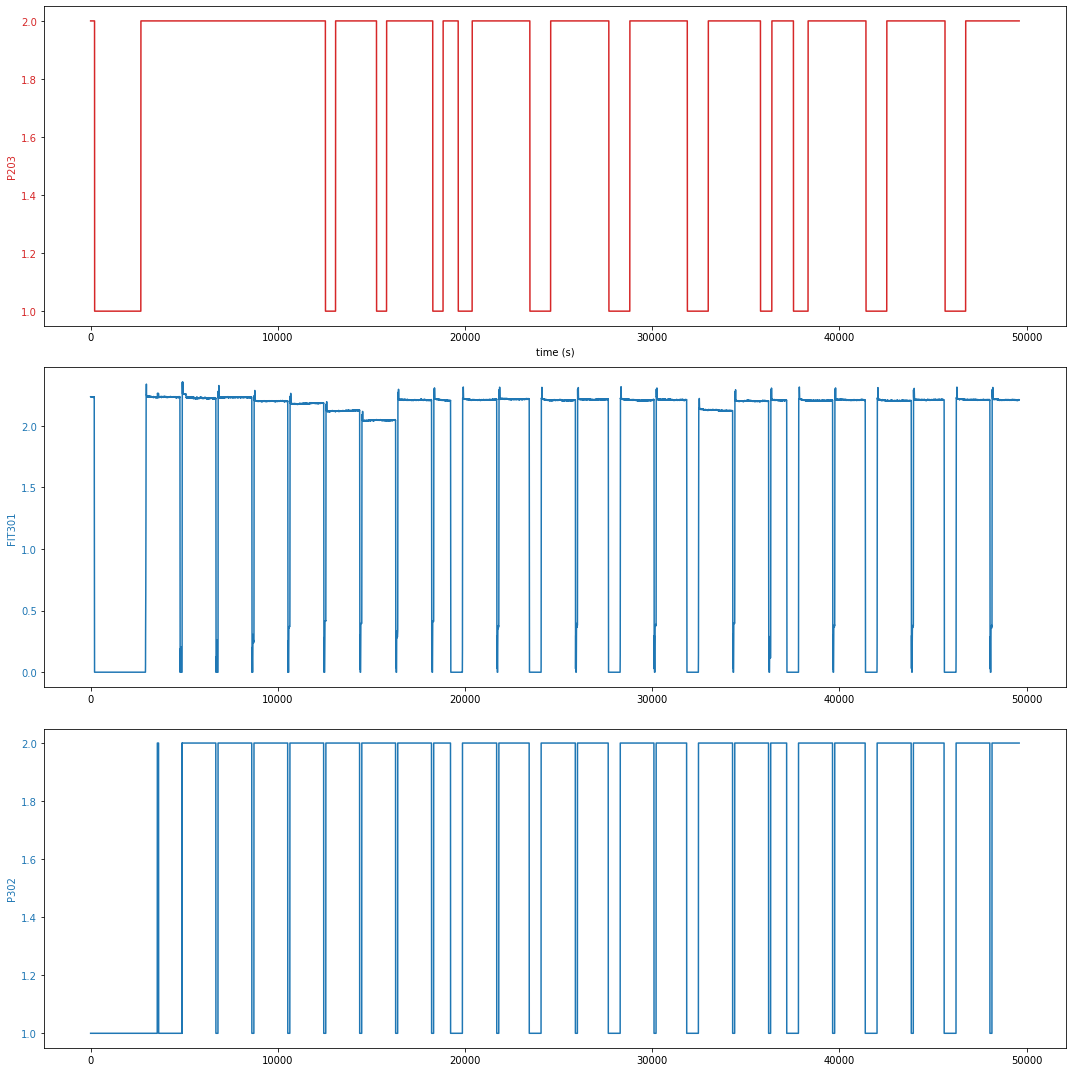

In [0]:
fig, ax = plt.subplots(3,figsize=(15,15))
color = 'tab:red'
ax[0].set_xlabel('time (s)')
ax[0].set_ylabel('P203', color=color)
ax[0].plot(xpoints[:],sample_plot['P203'][:], color=color)
ax[0].tick_params(axis='y', labelcolor=color)
 

color = 'tab:blue'
ax[1].set_ylabel('FIT301', color=color)  # we already handled the x-label with ax1
ax[1].plot(xpoints[:],sample_plot['FIT301'][:], color=color)
ax[1].tick_params(axis='y', labelcolor=color)
fig.tight_layout()

color = 'tab:blue'
ax[2].set_ylabel('P302', color=color)  # we already handled the x-label with ax1
ax[2].plot(xpoints[:],sample_plot['P302'][:], color=color)
ax[2].tick_params(axis='y', labelcolor=color)
fig.tight_layout()

plt.show()

In [0]:
!pip install hmmlearn

     |████████████████████████████████| 368kB 2.8MB/s 


In [0]:
sd=data[data_points_1:data_points_2]
num_col=(len(data.columns))
col_arr=data.columns
#print(data.columns[4])

uniq_ele_cols=[0]*num_col
for cols in range(num_col):
    x=data.columns[cols]
    uniq_ele_cols[cols]=x+"-"+str(data[x].nunique())
#print(uniq_ele_cols)


#COUNT BOOLEAN & SINGLE STATE VARIABLES
bool_count=0
bool_arr=[]
sing_state=0
sing_arr=[]
for cols in (uniq_ele_cols):
    #s=str(uniq_ele_cols[cols])
    x,y=cols.split('-')
    if int(y)==2 or int(y)==3:
        bool_count+=1
        bool_arr.append(x)
    if int(y)==1:
        sing_state+=1
        sing_arr.append(x)
        

NameError: ignored

In [0]:
import numpy as np
import hmmlearn

startprob = np.array([0.6, 0.3, 0.1])
transmat = np.array([[0.7, 0.2, 0.1], [0.3, 0.5, 0.2], [0.3, 0.3, 0.4]])
means = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
covars = np.tile(np.identity(2), (3, 1, 1))
model = hmmlearn.GaussianHMM(3, "full", startprob, transmat)
model.means_ = means
model.covars_ = covars
X, Z = model.sample(100)

AttributeError: ignored


Visual Trees
---



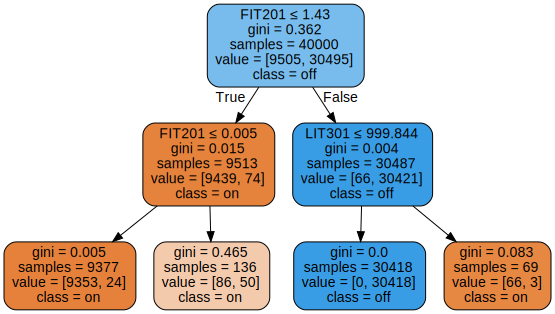

In [0]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf = clf.fit(X_feature, y_out)
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
# graph.render("iris") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_cols,  
                     class_names=["on","off"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


## Tree from Scratch
---



---



In [0]:
sd=data

In [0]:
header=sd.columns
print(header)

Index([' Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201',
       'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204',
       'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302',
       'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401',
       'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502',
       'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501',
       'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603',
       'Normal/Attack'],
      dtype='object')


In [0]:
def class_counts(rows):
    """Counts the number of each type of example in a dataset."""
    #LABELLING
    labels=sd['MV101']
    counts = {}  # a dictionary of label -> count.
    
    for i in range(len(labels)):
        # in our dataset format, the label is always the last column
        label = labels[i]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

In [0]:
len(sd['MV101'])

496800

In [0]:
#######
# Demo:
class_counts(sd['P101'])
#######

{0: 2002, 1: 135913, 2: 358885}

In [0]:
def is_numeric(value):
    """Test if a value is numeric."""
    return isinstance(value, int) or isinstance(value, float)

In [0]:
#######
# Demo:
is_numeric(7)
# is_numeric("Red")
#######

True

In [0]:
class Question:
    """A Question is used to partition a dataset.

    This class just records a 'column number' (e.g., 0 for Color) and a
    'column value' (e.g., Green). The 'match' method is used to compare
    the feature value in an example to the feature value stored in the
    question. See the demo below.
    """

    def __init__(self, column, value):
        self.column = column
        self.value = value
#         print("SEARCHING FOR ",value, "in column",column)

    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question.
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value
    

    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))

In [0]:
Question(4,1).column

4

In [0]:
#######
# Demo:
# Let's write a question for a numeric attribute
Question(4, 2)

SEARCHING FOR  2 in column 4


Is P101 >= 2?

In [0]:
# How about one for a categorical attribute
q = Question(4, 2)
q

SEARCHING FOR  2 in column 4


Is P101 >= 2?

In [0]:
example =  sd.loc[10]
print(example)

In [0]:
# Let's pick an example from the training set...
# example = sd['P101'][5]
# ... and see if it matches the question
q.match(example) # this will be true, since the first example is Green.
#######

True

In [0]:
def partition(df, question):
    """Partitions a dataset.
    

    For each row in the dataset, check if it matches the question. If
    so, add it to 'true rows', otherwise, add it to 'false rows'.
    """
    
    column= question.column
    col_name=str(df.columns[column])
    value=  question.value
  
    true_rows=df[df[col_name] > value]
    false_rows=df[df[col_name] == value]
    return true_rows, false_rows

In [0]:
#######
# Demo:
# Let's partition the training data based on whether rows are Red.
true_rows, false_rows = partition(sd, Question(4, 1))


P101


In [0]:
def gini(rows):
    """Calculate the Gini Impurity for a list of rows.

    There are a few different ways to do this, I thought this one was
    the most concise. See:
    https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
    """
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity

In [0]:
gini(sd['MV101'])

0.4032873401119824

In [0]:
def info_gain(left, right, current_uncertainty):
    """Information Gain.

    The uncertainty of the starting node, minus the weighted impurity of
    two child nodes.
    """
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)

In [0]:
current_uncertainty = gini(sd)
current_uncertainty

## NEW ALL TREE

In [0]:
# Run this program on your local python 
# interpreter, provided you have installed 
# the required libraries. 

# Importing the required packages 
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

# Function importing Dataset 
def importdata(): 
	balance_data = data
	
	# Printing the dataswet shape 
	print ("Dataset Length: ", len(balance_data)) 
	print ("Dataset Shape: ", balance_data.shape) 
	
	# Printing the dataset obseravtions 
	print ("Dataset: ",balance_data.head()) 
	return balance_data 

# Function to split the dataset 
def splitdataset(balance_data): 

	# Seperating the target variable 
	X = balance_data.values[:, 1:5] 
	Y = balance_data.values[:, 0] 

	# Spliting the dataset into train and test 
	X_train, X_test, y_train, y_test = train_test_split( 
	X, Y, test_size = 0.3, random_state = 100) 
	
	return X, Y, X_train, X_test, y_train, y_test 
	
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 

	# Creating the classifier object 
	clf_gini = DecisionTreeClassifier(criterion = "gini", 
			random_state = 100,max_depth=3, min_samples_leaf=5) 

	# Performing training 
	clf_gini.fit(X_train, y_train) 
	return clf_gini 
	
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 

	# Decision tree with entropy 
	clf_entropy = DecisionTreeClassifier( 
			criterion = "entropy", random_state = 100, 
			max_depth = 3, min_samples_leaf = 5) 

	# Performing training 
	clf_entropy.fit(X_train, y_train) 
	return clf_entropy 


# Function to make predictions 
def prediction(X_test, clf_object): 

	# Predicton on test with giniIndex 
	y_pred = clf_object.predict(X_test) 
	print("Predicted values:") 
	print(y_pred) 
	return y_pred 
	
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
	
	print("Confusion Matrix: ", 
		confusion_matrix(y_test, y_pred)) 
	
	print ("Accuracy : ", 
	accuracy_score(y_test,y_pred)*100) 
	
	print("Report : ", 
	classification_report(y_test, y_pred)) 

# Driver code 
def main(): 
	
	# Building Phase 
	data = importdata() 
	X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
	clf_gini = train_using_gini(X_train, X_test, y_train) 
	clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
	
	# Operational Phase 
	print("Results Using Gini Index:") 
	
	# Prediction using gini 
	y_pred_gini = prediction(X_test, clf_gini) 
	cal_accuracy(y_test, y_pred_gini) 
	
	print("Results Using Entropy:") 
	# Prediction using entropy 
	y_pred_entropy = prediction(X_test, clf_entropy) 
	cal_accuracy(y_test, y_pred_entropy) 
	
	
# Calling main function 
if __name__=="__main__": 
	main() 


Dataset Length:  496800
Dataset Shape:  (496800, 53)
Dataset:                  Timestamp    FIT101    LIT101  ...  P602  P603  Normal/Attack
0   22/12/2015 4:00:00 PM  2.470294  261.5804  ...     1     1         Normal
1   22/12/2015 4:00:01 PM  2.457163  261.1879  ...     1     1         Normal
2   22/12/2015 4:00:02 PM  2.439548  260.9131  ...     1     1         Normal
3   22/12/2015 4:00:03 PM  2.428338  260.2850  ...     1     1         Normal
4   22/12/2015 4:00:04 PM  2.424815  259.8925  ...     1     1         Normal

[5 rows x 53 columns]


## Correlation PLOTS

In [0]:
sample_corr=sample_data[['MV101','MV201']]

In [0]:
sample_corr.describe()

,MV101,MV201
count,496799.000000,496799.000000
mean,1.722393,1.747834
std,0.447819,0.434257
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,2.000000,2.000000
max,2.000000,2.000000


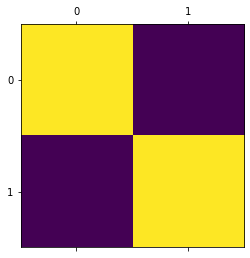

In [0]:
plt.matshow(sample_corr.corr())
plt.show()

In [0]:
corr = sample_corr.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps


,MV101,MV201
MV101,1,0.239873
MV201,0.239873,1


In [0]:
diff=data['MV101']-data['MV201']

# print(diff.sum()/len(data['MV101']))

TypeError: ignored

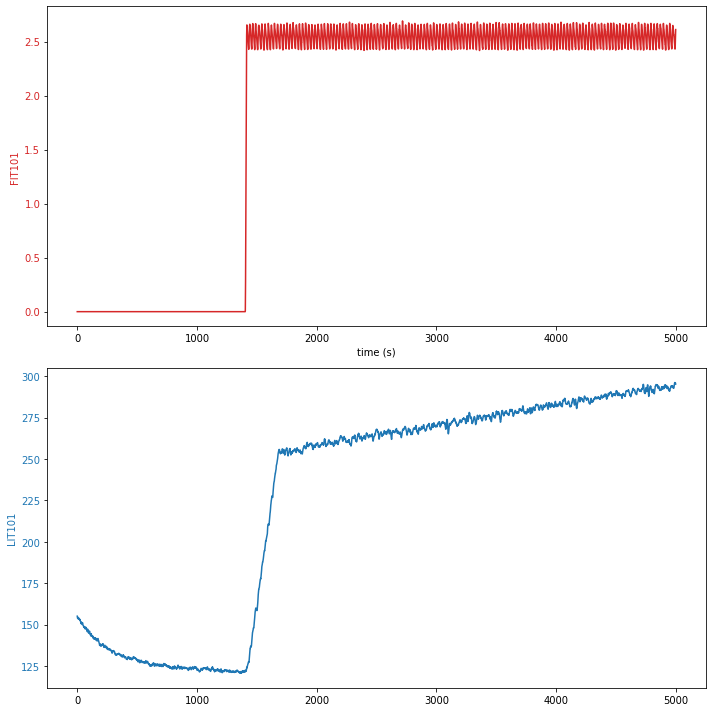

In [0]:
fig, ax = plt.subplots(2,figsize=(10,10))
color = 'tab:red'
ax[0].set_xlabel('time (s)')
ax[0].set_ylabel('FIT101', color=color)
ax[0].plot(list(range(len(sample_plot['P101'][1000:6000]))),sample_plot['FIT101'][1000:6000], color=color)
ax[0].tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax[1].set_ylabel('LIT101', color=color)  # we already handled the x-label with ax1
ax[1].plot(list(range(len(sample_plot['LIT101'][1000:6000]))),sample_plot['LIT101'][1000:6000], color=color)
ax[1].tick_params(axis='y', labelcolor=color)
fig.tight_layout()



# RANDOM FOREST
---



---



In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics, datasets, ensemble
from sklearn import metrics
import random

In [0]:
#_________P302____________________________________________#
# Features
feature_cols = [ 'FIT201', 'LIT301',  'FIT401', 'LIT401']
x_data = data[feature_cols].values


# Target variable
target=['P302']
y_data = data[target].values

print(x_data.shape,y_data.shape)

(496800, 4) (496800, 1)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.75, random_state = 100)


In [0]:
print(X_train.shape,y_train.shape, X_test.shape,  y_test.shape)

(124200, 4) (124200, 1) (372600, 4) (372600, 1)


In [0]:
clf = ensemble.RandomForestClassifier(n_estimators=3, max_depth=2,
                             random_state=0)
clf.fit(X_train, y_train.ravel())  
print(clf.feature_importances_)


[0.27938002 0.48533926 0.         0.23528072]


In [0]:
y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9452227589908749


In [0]:
#_________MV101____________________________________________#
# Features
feature_cols = [ 'LIT101', 'LIT301',  'FIT401', 'LIT401']
x_data = data[feature_cols]


# Target variable
target=['MV101']
y_data = data[target]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.15, random_state = 100)


In [0]:
clf = ensemble.RandomForestClassifier(n_estimators=1, max_depth=2,
                             random_state=0)
clf.fit(X_train, y_train.ravel())  
print(clf.feature_importances_)


AttributeError: ignored

In [0]:
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

NotFittedError: ignored

In [0]:
clf = ensemble.RandomForestClassifier(n_estimators=3, max_depth=2,
                             random_state=0)
clf.fit(X_train, y_train.ravel())  
print(clf.feature_importances_)


AttributeError: ignored

In [0]:
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

NotFittedError: ignored

In [0]:
def print_decision_rules(rf):

    for tree_idx, est in enumerate(rf.estimators_):
        tree = est.tree_
        assert tree.value.shape[1] == 1 # no support for multi-output

        print('TREE: {}'.format(tree_idx))

        iterator = enumerate(zip(tree.children_left, tree.children_right, tree.feature, tree.threshold, tree.value))
        for node_idx, data in iterator:
            left, right, feature, th, value = data

            # left: index of left child (if any)
            # right: index of right child (if any)
            # feature: index of the feature to check
            # th: the threshold to compare against
            # value: values associated with classes            

            # for classifier, value is 0 except the index of the class to return
            class_idx = numpy.argmax(value[0])

            if left == -1 and right == -1:
                print('{} LEAF: return class={}'.format(node_idx, class_idx))
            else:
                print('{} NODE: if feature[{}] < {} then next={} else next={}'.format(node_idx, feature, th, left, right))    

In [0]:
#Random Forest Model P302
estimator = ensemble.RandomForestClassifier(n_estimators=3, max_depth=2)
estimator.fit(X_train, y_train.ravel())
print("\n","FEATURE IMPORTANCE: ",estimator.feature_importances_,"\n")
print_decision_rules(estimator)

AttributeError: ignored

In [0]:
sample_predict=test_df[['FIT301', 'LIT301',  'FIT401', 'LIT401']]

In [0]:
y_pred=estimator.predict(sample_predict)
y_test=test_df[['P302']]

In [0]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9997342995169082


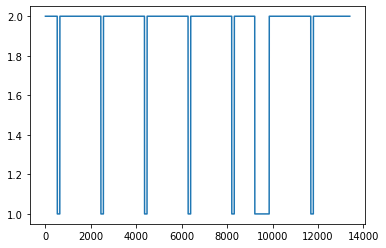

In [0]:

plt.plot(x,y)

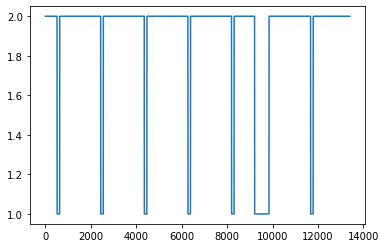

In [0]:
plt.plot(x,sample_data[['P302']][10014:23414])

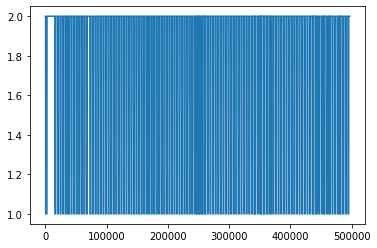

In [0]:
sample_predict=data[['FIT101','LIT101','P101']]
y_pred=estimator.predict(sample_predict)

plt.plot(list(range(len(y_pred))),y_pred)

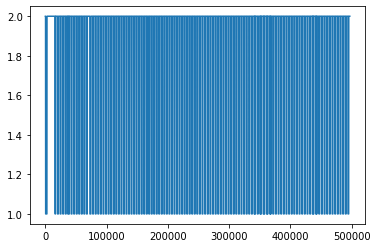

In [0]:
plt.plot(list(range(len(data[['MV101']]))),data[['MV101']])

Accuracy: 0.9977314769152111


In [0]:
feature=np.array([0,0,0,0]).reshape(1,-1)
clf.predict([[2.3587740000000004,0, 0, 2]])

array([1])

## P101 Random Forest

In [0]:
#_________P101____________________________________________#
# Features
feature_cols = [ 'LIT101','LIT301','FIT201', 'MV101','P301', 'P302', 'P401', 'P402', 'P403', 'P404', 'P501', 'P502',
       'P601', 'P602', 'P603']
x_data = data[feature_cols].values


# Target variable
target=['P101']
y_data = data[target].values

print(x_data.shape,y_data.shape)

(496800, 15) (496800, 1)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.20, random_state = 100)


In [0]:
print(X_train.shape,y_train.shape, X_test.shape,  y_test.shape)

(397440, 15) (397440, 1) (99360, 15) (99360, 1)


In [0]:
clf = ensemble.RandomForestClassifier(n_estimators=3, max_depth=2,
                             random_state=0)
clf.fit(X_train, y_train.ravel())  
print(clf.feature_importances_)


NameError: ignored

In [0]:
#ACCURACY of Random Forest (P101)
y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8369665861513688


In [0]:
print("\n","FEATURE IMPORTANCE: ",clf.feature_importances_,"\n")
print_decision_rules(clf)


 FEATURE IMPORTANCE:  [9.90757754e-01 1.57589677e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.02998498e-03 0.00000000e+00 0.00000000e+00 3.21210345e-03
 0.00000000e+00] 

TREE: 0
0 NODE: if feature[11] < 1.5 then next=1 else next=4
1 NODE: if feature[0] < 542.4927368164062 then next=2 else next=3
2 LEAF: return class=1
3 LEAF: return class=0
4 NODE: if feature[1] < 1.5 then next=5 else next=6
5 LEAF: return class=1
6 LEAF: return class=1
TREE: 1
0 NODE: if feature[11] < 1.5 then next=1 else next=4
1 NODE: if feature[0] < 543.0226440429688 then next=2 else next=3
2 LEAF: return class=1
3 LEAF: return class=0
4 NODE: if feature[0] < 530.40283203125 then next=5 else next=6
5 LEAF: return class=1
6 LEAF: return class=1
TREE: 2
0 NODE: if feature[8] < 1.5 then next=1 else next=4
1 NODE: if feature[0] < 250.25595092773438 then next=2 else next=3
2 LEAF: return class=0
3 LEAF: return class=1
4 NODE: if feature[0] < 543.3170471191406 then n

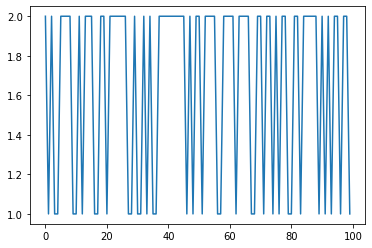

In [0]:
#PLOT Predicted P101
plt.plot(list(range(len(y_pred[:100]))),y_pred[:100])

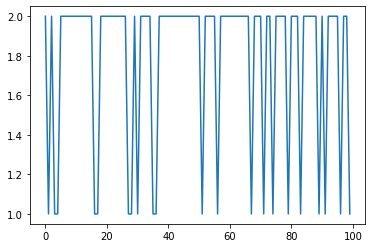

In [0]:
#PLOT Test Set 
plt.plot(list(range(len(y_test[:100]))),y_test[:100])

## P203 Random Forest 

# HMM

In [0]:
obs=data['P101'].to_numpy()
hidden1=data[['LIT101']].to_numpy()
hidden2=data[['LIT301']].to_numpy()
hidden3=data[['FIT201']].to_numpy()

In [0]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# create state space and initial state probabilities

states = ['sleeping', 'eating', 'pooping']
pi = [0.35, 0.35, 0.3]
state_space = pd.Series(pi, index=states, name='states')
print(state_space)
print(state_space.sum())

sleeping    0.35
eating      0.35
pooping     0.30
Name: states, dtype: float64
1.0


In [0]:
# create transition matrix
# equals transition probability matrix of changing states given a state
# matrix is size (M x M) where M is number of states

q_df = pd.DataFrame(columns=states, index=states)
q_df.loc[states[0]] = [0.4, 0.2, 0.4]
q_df.loc[states[1]] = [0.45, 0.45, 0.1]
q_df.loc[states[2]] = [0.45, 0.25, .3]

print(q_df)

q = q_df.values
print('\n', q, q.shape, '\n')
print(q_df.sum(axis=1))

         sleeping eating pooping
sleeping      0.4    0.2     0.4
eating       0.45   0.45     0.1
pooping      0.45   0.25     0.3

 [[0.4 0.2 0.4]
 [0.45 0.45 0.1]
 [0.45 0.25 0.3]] (3, 3) 

sleeping    1.0
eating      1.0
pooping     1.0
dtype: float64


In [0]:
from pprint import pprint 

# create a function that maps transition probability dataframe 
# to markov edges and weights

def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges

edges_wts = _get_markov_edges(q_df)
pprint(edges_wts)

{('eating', 'eating'): 0.45,
 ('eating', 'pooping'): 0.1,
 ('eating', 'sleeping'): 0.45,
 ('pooping', 'eating'): 0.25,
 ('pooping', 'pooping'): 0.3,
 ('pooping', 'sleeping'): 0.45,
 ('sleeping', 'eating'): 0.2,
 ('sleeping', 'pooping'): 0.4,
 ('sleeping', 'sleeping'): 0.4}


Nodes:
['sleeping', 'eating', 'pooping']

Edges:
OutMultiEdgeDataView([('sleeping', 'sleeping', {'weight': 0.4, 'label': 0.4}), ('sleeping', 'eating', {'weight': 0.2, 'label': 0.2}), ('sleeping', 'pooping', {'weight': 0.4, 'label': 0.4}), ('eating', 'sleeping', {'weight': 0.45, 'label': 0.45}), ('eating', 'eating', {'weight': 0.45, 'label': 0.45}), ('eating', 'pooping', {'weight': 0.1, 'label': 0.1}), ('pooping', 'sleeping', {'weight': 0.45, 'label': 0.45}), ('pooping', 'eating', {'weight': 0.25, 'label': 0.25}), ('pooping', 'pooping', {'weight': 0.3, 'label': 0.3})])


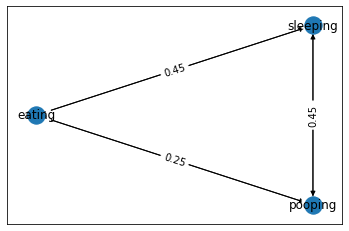

In [0]:
# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(states)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent transition probabilities
for k, v in edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
print(f'Edges:')
pprint(G.edges(data=True))    

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos)

# create edge labels for jupyter plot but is not necessary
edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'pet_dog_markov.dot')